In [ ]:
#Data Set
#https://zdataset.com/free-dataset/honey-production-in-the-usa-1998-2012

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
#read honeyproduction data
hp=pd.read_csv(r"D:\D DRIVE\pandas\dataset\honeyproduction.csv")

In [3]:
hp.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
hp.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [5]:
hp.shape

(626, 8)

In [6]:
hp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
numcol,626.0,6.028435e+04,9.107709e+04,2000.00,9000.0000,26000.00,63750.00,510000.00
yieldpercol,626.0,6.200958e+01,1.945875e+01,19.00,48.0000,60.00,74.00,136.00
totalprod,626.0,4.169086e+06,6.883847e+06,84000.00,475000.0000,1533000.00,4175250.00,46410000.00
stocks,626.0,1.318859e+06,2.272964e+06,8000.00,143000.0000,439500.00,1489500.00,13800000.00
priceperlb,626.0,1.409569e+00,6.385989e-01,0.49,0.9325,1.36,1.68,4.15
prodvalue,626.0,4.715741e+06,7.976110e+06,162000.00,759250.0000,1841500.00,4703250.00,69615000.00
year,626.0,2.004864e+03,4.317306e+00,1998.00,2001.0000,2005.00,2009.00,2012.00


In [7]:
hp_year=hp[['numcol','totalprod','year','yieldpercol','stocks','prodvalue']].groupby('year').sum()

In [8]:
hp_year

,numcol,totalprod,yieldpercol,stocks,prodvalue
year,,,,,
1998,2621000.0,219519000.0,3008,80565000.0,146091000.0
1999,2637000.0,202387000.0,2815,78390000.0,123657000.0
2000,2604000.0,219558000.0,2906,84956000.0,131568000.0
2001,2542000.0,185748000.0,2840,64764000.0,132282000.0
2002,2565000.0,171265000.0,2939,39177000.0,227302000.0
2003,2591000.0,181372000.0,2752,40619000.0,252079000.0
2004,2539000.0,182729000.0,2657,60981000.0,197307000.0
2005,2394000.0,173969000.0,2635,62187000.0,160793000.0
2006,2378000.0,154238000.0,2536,60235000.0,157924000.0


In [9]:
# adding index
hp_year.reset_index(level=0,inplace=True)

In [10]:
hp_year.head()

,year,numcol,totalprod,yieldpercol,stocks,prodvalue
0,1998,2621000.0,219519000.0,3008,80565000.0,146091000.0
1,1999,2637000.0,202387000.0,2815,78390000.0,123657000.0
2,2000,2604000.0,219558000.0,2906,84956000.0,131568000.0
3,2001,2542000.0,185748000.0,2840,64764000.0,132282000.0
4,2002,2565000.0,171265000.0,2939,39177000.0,227302000.0


Text(0, 0.5, 'yieldpercol')

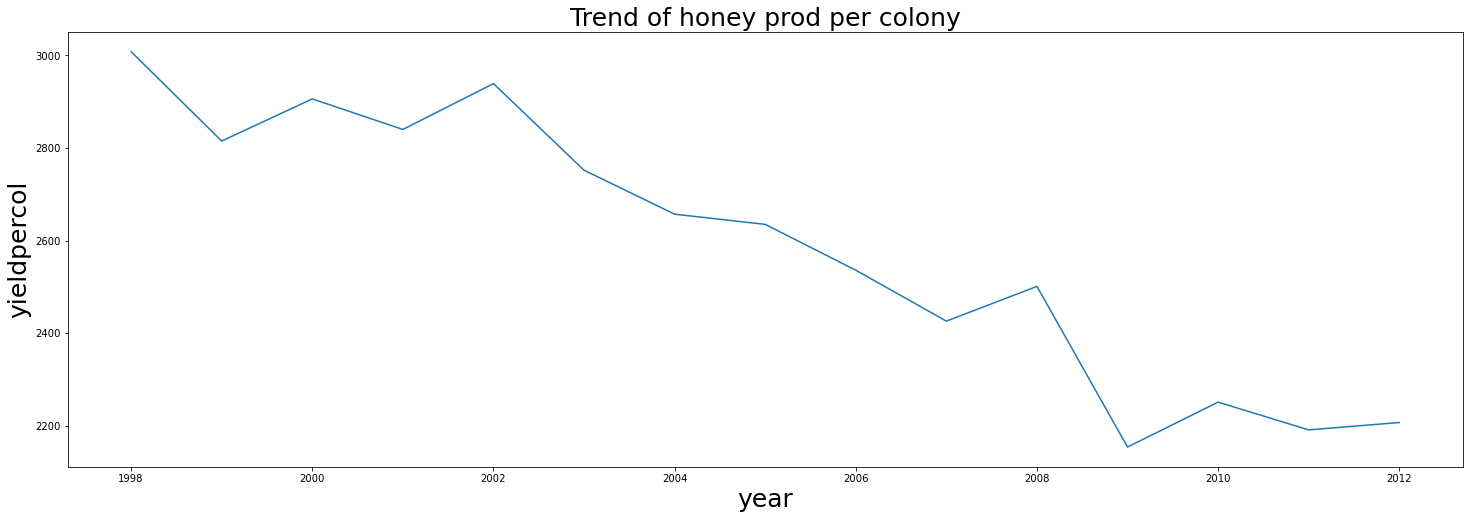

In [11]:
#Data visvalization
plt.figure(figsize=(25,8))
plt.plot(hp_year['year'],hp_year['yieldpercol'])
plt.title('Trend of honey prod per colony',fontsize=25)
plt.xlabel('year',fontsize=25)
plt.ylabel('yieldpercol',fontsize=25)


Text(0, 0.5, 'total honey production')

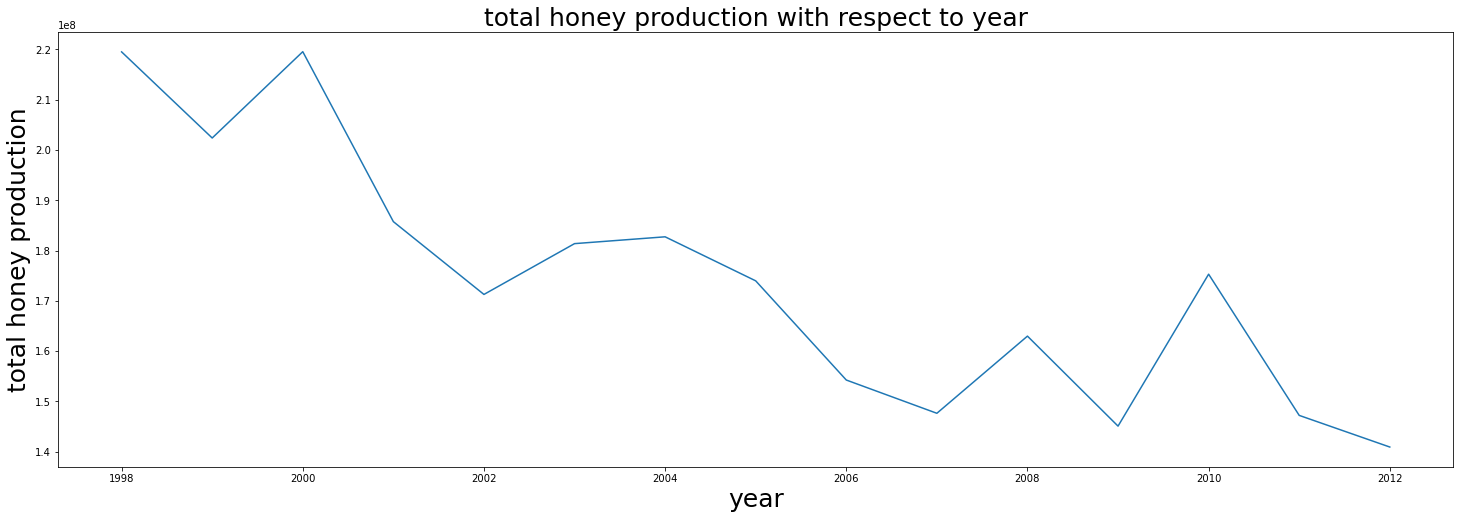

In [11]:
#visvalize total honey production with respect to year
plt.figure(figsize=(25,8))
plt.plot(hp_year['year'],hp_year['totalprod'])
plt.title('total honey production with respect to year',fontsize=25)
plt.xlabel('year',fontsize=25)
plt.ylabel('total honey production',fontsize=25)


In [12]:
US_State=hp[['state','totalprod','yieldpercol']].groupby('state').sum()
US_State.reset_index(level=0,inplace=True)
US_State.sort_values(by='totalprod',ascending=False,inplace=True)
US_State.head()

,state,totalprod,yieldpercol
23,ND,475085000.0,1321
3,CA,347535000.0,837
34,SD,266141000.0,1137
5,FL,247048000.0,1246
21,MT,156562000.0,1160


Text(0, 0.5, 'total honey production')

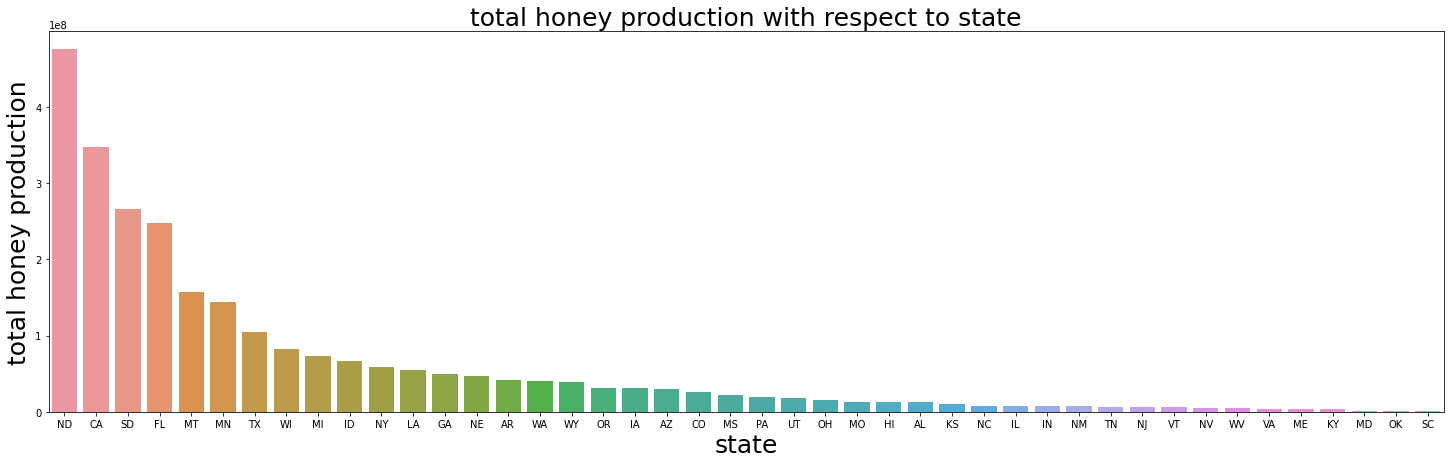

In [13]:
#visvalize total honey production with respect to state
plt.figure(figsize=(25,7))
sns.barplot(US_State['state'],US_State['totalprod'])
plt.title('total honey production with respect to state',fontsize=25)
plt.xlabel('state',fontsize=25)
plt.ylabel('total honey production',fontsize=25)




In [14]:
US_State_max=hp[['state','totalprod']].groupby('state').max()
US_State_max.reset_index(level=0,inplace=True)
US_State_max.columns=['state','max prod']
US_State_max.head()

,state,max prod
0,AL,1248000.0
1,AR,4900000.0
2,AZ,3300000.0
3,CA,37350000.0
4,CO,2700000.0


In [15]:
US_State_min=hp[['state','totalprod']].groupby('state').min()
US_State_min.reset_index(level=0,inplace=True)
US_State_min.columns=['state','min prod']
US_State_max.head()

,state,max prod
0,AL,1248000.0
1,AR,4900000.0
2,AZ,3300000.0
3,CA,37350000.0
4,CO,2700000.0


In [16]:
St_range = pd.merge(US_State_max,US_State_min,how='inner',on='state')

In [17]:
St_range.head()

,state,max prod,min prod
0,AL,1248000.0,432000.0
1,AR,4900000.0,1368000.0
2,AZ,3300000.0,1012000.0
3,CA,37350000.0,11550000.0
4,CO,2700000.0,1200000.0


In [18]:
St_range['per change'] = ((St_range['max prod']-St_range['min prod'])/(St_range['max prod']))*100
St_range.sort_values(by='per change',ascending=False,inplace=True)
St_range.head()

,state,max prod,min prod,per change
19,MO,1725000.0,344000.0,80.057971
26,NM,960000.0,246000.0,74.375000
16,ME,451000.0,120000.0,73.392461
15,MD,308000.0,84000.0,72.727273
12,KS,1120000.0,308000.0,72.500000


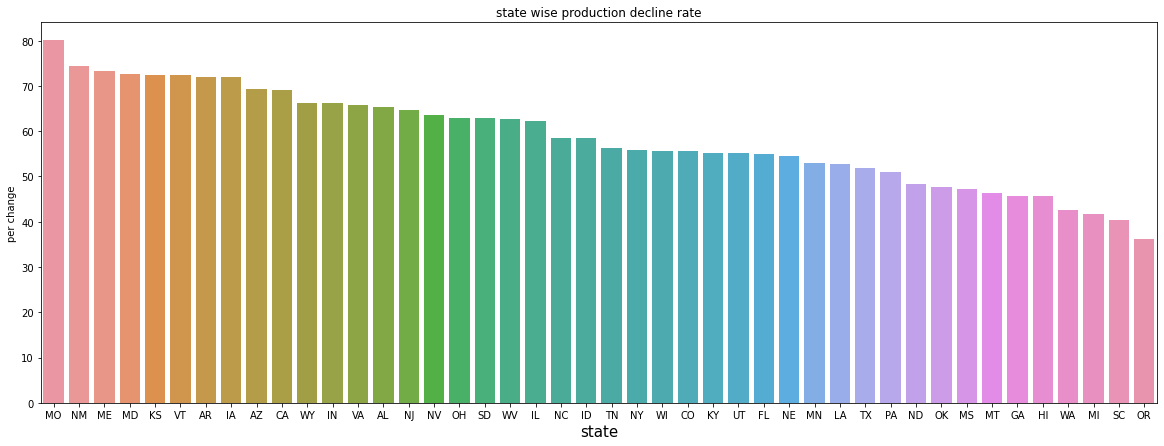

In [19]:
plt.figure(figsize=(20,7))
sns.barplot(x='state',y='per change',data=St_range)
plt.title('state wise production decline rate')
plt.xlabel("state",fontsize=15)
plt.ylabel=("%decline")

In [20]:
hp.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [21]:
y_corr = hp [['numcol','totalprod','year','yieldpercol','stocks','prodvalue','priceperlb']].corr()

In [22]:
y_corr

,numcol,totalprod,year,yieldpercol,stocks,prodvalue,priceperlb
numcol,1.000000,0.953594,0.008709,0.243515,0.825929,0.912796,-0.232701
totalprod,0.953594,1.000000,-0.055556,0.396252,0.878830,0.907236,-0.264499
year,0.008709,-0.055556,1.000000,-0.232092,-0.119602,0.139451,0.693984
yieldpercol,0.243515,0.396252,-0.232092,1.000000,0.367812,0.278977,-0.358646
stocks,0.825929,0.878830,-0.119602,0.367812,1.000000,0.728560,-0.305867
prodvalue,0.912796,0.907236,0.139451,0.278977,0.728560,1.000000,-0.089567
priceperlb,-0.232701,-0.264499,0.693984,-0.358646,-0.305867,-0.089567,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

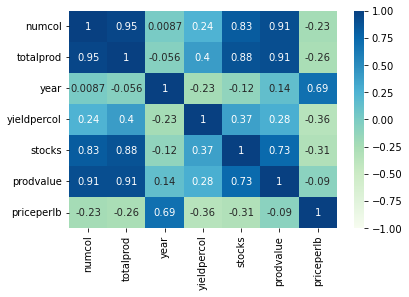

In [23]:
sns.heatmap(y_corr,annot=True,vmin=-1,vmax=1,cmap='GnBu')
plt.show

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(hp.drop(['totalprod','state'],axis=1),hp['totalprod'],test_size=0.20,random_state=8)

In [26]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
accuracy=model.score(X_test,y_test)
print(accuracy*100)

95.25114307256163
